In [ ]:
# ========================================================================
#                 Deep Learning For Computer Vision
# ========================================================================
#   Module: CS503- Deep Learning for Computer Vision
#   Topic: Introduction to CNN using MNIST Dataset
#
#  Description:
#  -----------
#  This notebook introduces Convolutional Neural Networks (CNNs) using the
#  MNIST dataset. We'll implement a CNN model for handwritten digit
#  recognition and visualize its performance to understand the fundamentals
#  of convolutional processing for image data.
#
#  Author: Dr. Saad Laouadi
#  Version: 1.0
#
# ========================================================================
#  ®Copyright Dr. Saad Laouadi, 2025. All rights reserved.
# ========================================================================

In [19]:
# Environment Setup 
import sys 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

import tensorflow as tf 

# import the mnist dataset 
from tensorflow.keras.datasets import mnist

# load notebook extensions 
print("*"*52)
%reload_ext watermark 
%watermark -a "Dr. Saad Laouadi"
%watermark -ud 
%watermark -iv
print("*"*52)

****************************************************
Author: Dr. Saad Laouadi

Last updated: 2025-04-08

numpy     : 2.1.3
matplotlib: 3.10.0
sys       : 3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
keras     : 3.9.2
tensorflow: 2.19.0
pandas    : 2.2.3

****************************************************


In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
# Check the shape of each dataset
print(f"The X-train set: {x_train.shape}")
print(f"The X-test set : {x_test.shape}")
print(f"The y-train set: {y_train.shape}")
print(f"The y-test set : {y_test.shape}")

The X-train set: (60000, 28, 28)
The X-test set : (10000, 28, 28)
The y-train set: (60000,)
The y-test set : (10000,)


In [25]:
x_train.ndim  # 60000: N-samples
              # 28   : N-rows (height) 
              # 28   : N-cols (width)

3

In [29]:
x_train[0, :10, :10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156]], dtype=uint8)

In [30]:
first_img = x_train[0, : , :]

In [32]:
first_img.shape

(28, 28)

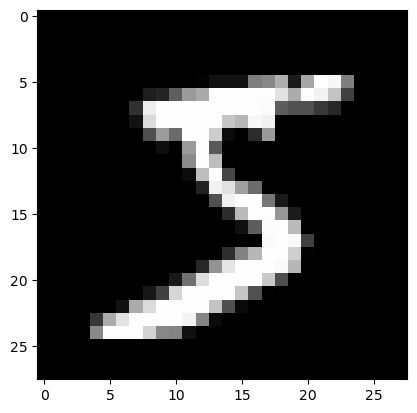

In [38]:
plt.imshow(first_img, cmap="gray")
# plt.xticks(None)
plt.show()

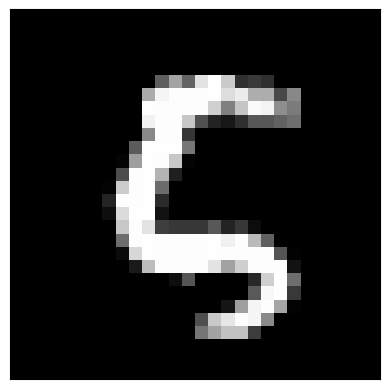

In [45]:
plt.imshow(x_train[2000], cmap="gray")

plt.xticks([])
plt.yticks([])

plt.show()

In [47]:
x_train[0].shape

(28, 28)

In [48]:
# The next step is to build a model to classification 
# Keras: (n-samples, height, width, n-channels)
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

In [50]:
x_train[0].reshape(img_rows, img_cols, 1).shape

(28, 28, 1)

In [54]:
# (60000, 28, 28, 1)
# reshape x_train and x_test to fit keras requirements
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [60]:
# x_train[0,:10, :10]

In [61]:
# I need to input_shape for the model 
input_shape = (img_rows, img_cols, 1)

In [63]:
# Change the data type 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [65]:
x_train.max()

np.float32(255.0)

In [68]:
# Normalize the data 
x_train /= 255 # x = x/255  
x_test /= 255

In [69]:
print(x_train.min())
print(x_train.max())

0.0
1.0


In [ ]:
# One-hot Encoding 

In [70]:
# Let us check the labels
y_train.shape 

(60000,)

In [71]:
y_train[0]

np.uint8(5)

In [72]:
y_test.shape

(10000,)

In [76]:
x_test[0].flatten().shape

(784,)

In [ ]:
tf.keras.layers.MaxPool2D

In [ ]:
y_test

In [84]:
# y_test.nunique

In [77]:
# Let us build a deep Learning model classifier for digits datasets 

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape = input_shape),
        tf.keras.layers.Conv2D(filters=32, 
                               kernel_size= (3,3),
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [86]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer="adam", 
              metrics=['accuracy']
             )

In [87]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [88]:
model.fit(
    x_train,
    y_train,
    batch_size=32, 
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8808 - loss: 0.4193 - val_accuracy: 0.9761 - val_loss: 0.0793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9767 - loss: 0.0796 - val_accuracy: 0.9781 - val_loss: 0.0649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9828 - loss: 0.0576 - val_accuracy: 0.9805 - val_loss: 0.0603
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9872 - loss: 0.0435 - val_accuracy: 0.9832 - val_loss: 0.0547
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9889 - loss: 0.0374 - val_accuracy: 0.9808 - val_loss: 0.0607
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9906 - loss: 0.0311 - val_accuracy: 0.9835 - val_loss: 0.0564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9917 - loss: 0.0282 - val_accuracy: 0.9832 - val_loss: 0.0568
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9930 - loss: 0